In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import sklearn

In [3]:
sklearn.__version__

'0.21.3'

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
bc_dataset = load_breast_cancer()

In [6]:
print(bc_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
feature_names = bc_dataset['feature_names']

In [8]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
target_names = bc_dataset['target_names']
target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
features = bc_dataset['data']
targets = bc_dataset['target']

In [11]:
features.shape

(569, 30)

In [12]:
targets.shape

(569,)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
bc_features_df = pd.DataFrame(data = features[:,:10], columns=feature_names[:10])
bc_features_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [15]:
bc_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
mean radius               569 non-null float64
mean texture              569 non-null float64
mean perimeter            569 non-null float64
mean area                 569 non-null float64
mean smoothness           569 non-null float64
mean compactness          569 non-null float64
mean concavity            569 non-null float64
mean concave points       569 non-null float64
mean symmetry             569 non-null float64
mean fractal dimension    569 non-null float64
dtypes: float64(10)
memory usage: 44.5 KB


In [16]:
bc_targets_df = pd.DataFrame(data = targets, columns=['Class'])
bc_targets_df.head(5)

,Class
0,0
1,0
2,0
3,0
4,0


In [17]:
bc_targets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
Class    569 non-null int64
dtypes: int64(1)
memory usage: 4.5 KB


In [18]:
bc_targets_df.nunique()

Class    2
dtype: int64

In [19]:
bc_targets_df['Class'].value_counts()

1    357
0    212
Name: Class, dtype: int64

In [41]:
bc_dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

    * malignant: 0, benign: 1

### Data Preprocessing

#### Checking the distribution of each feature

In [21]:
bc_features_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


    * Features such as mean concavity, concave points, area have a high std. 

In [22]:
# Plotting the distribution
import seaborn as sns

In [30]:
sns.set(style = 'ticks')

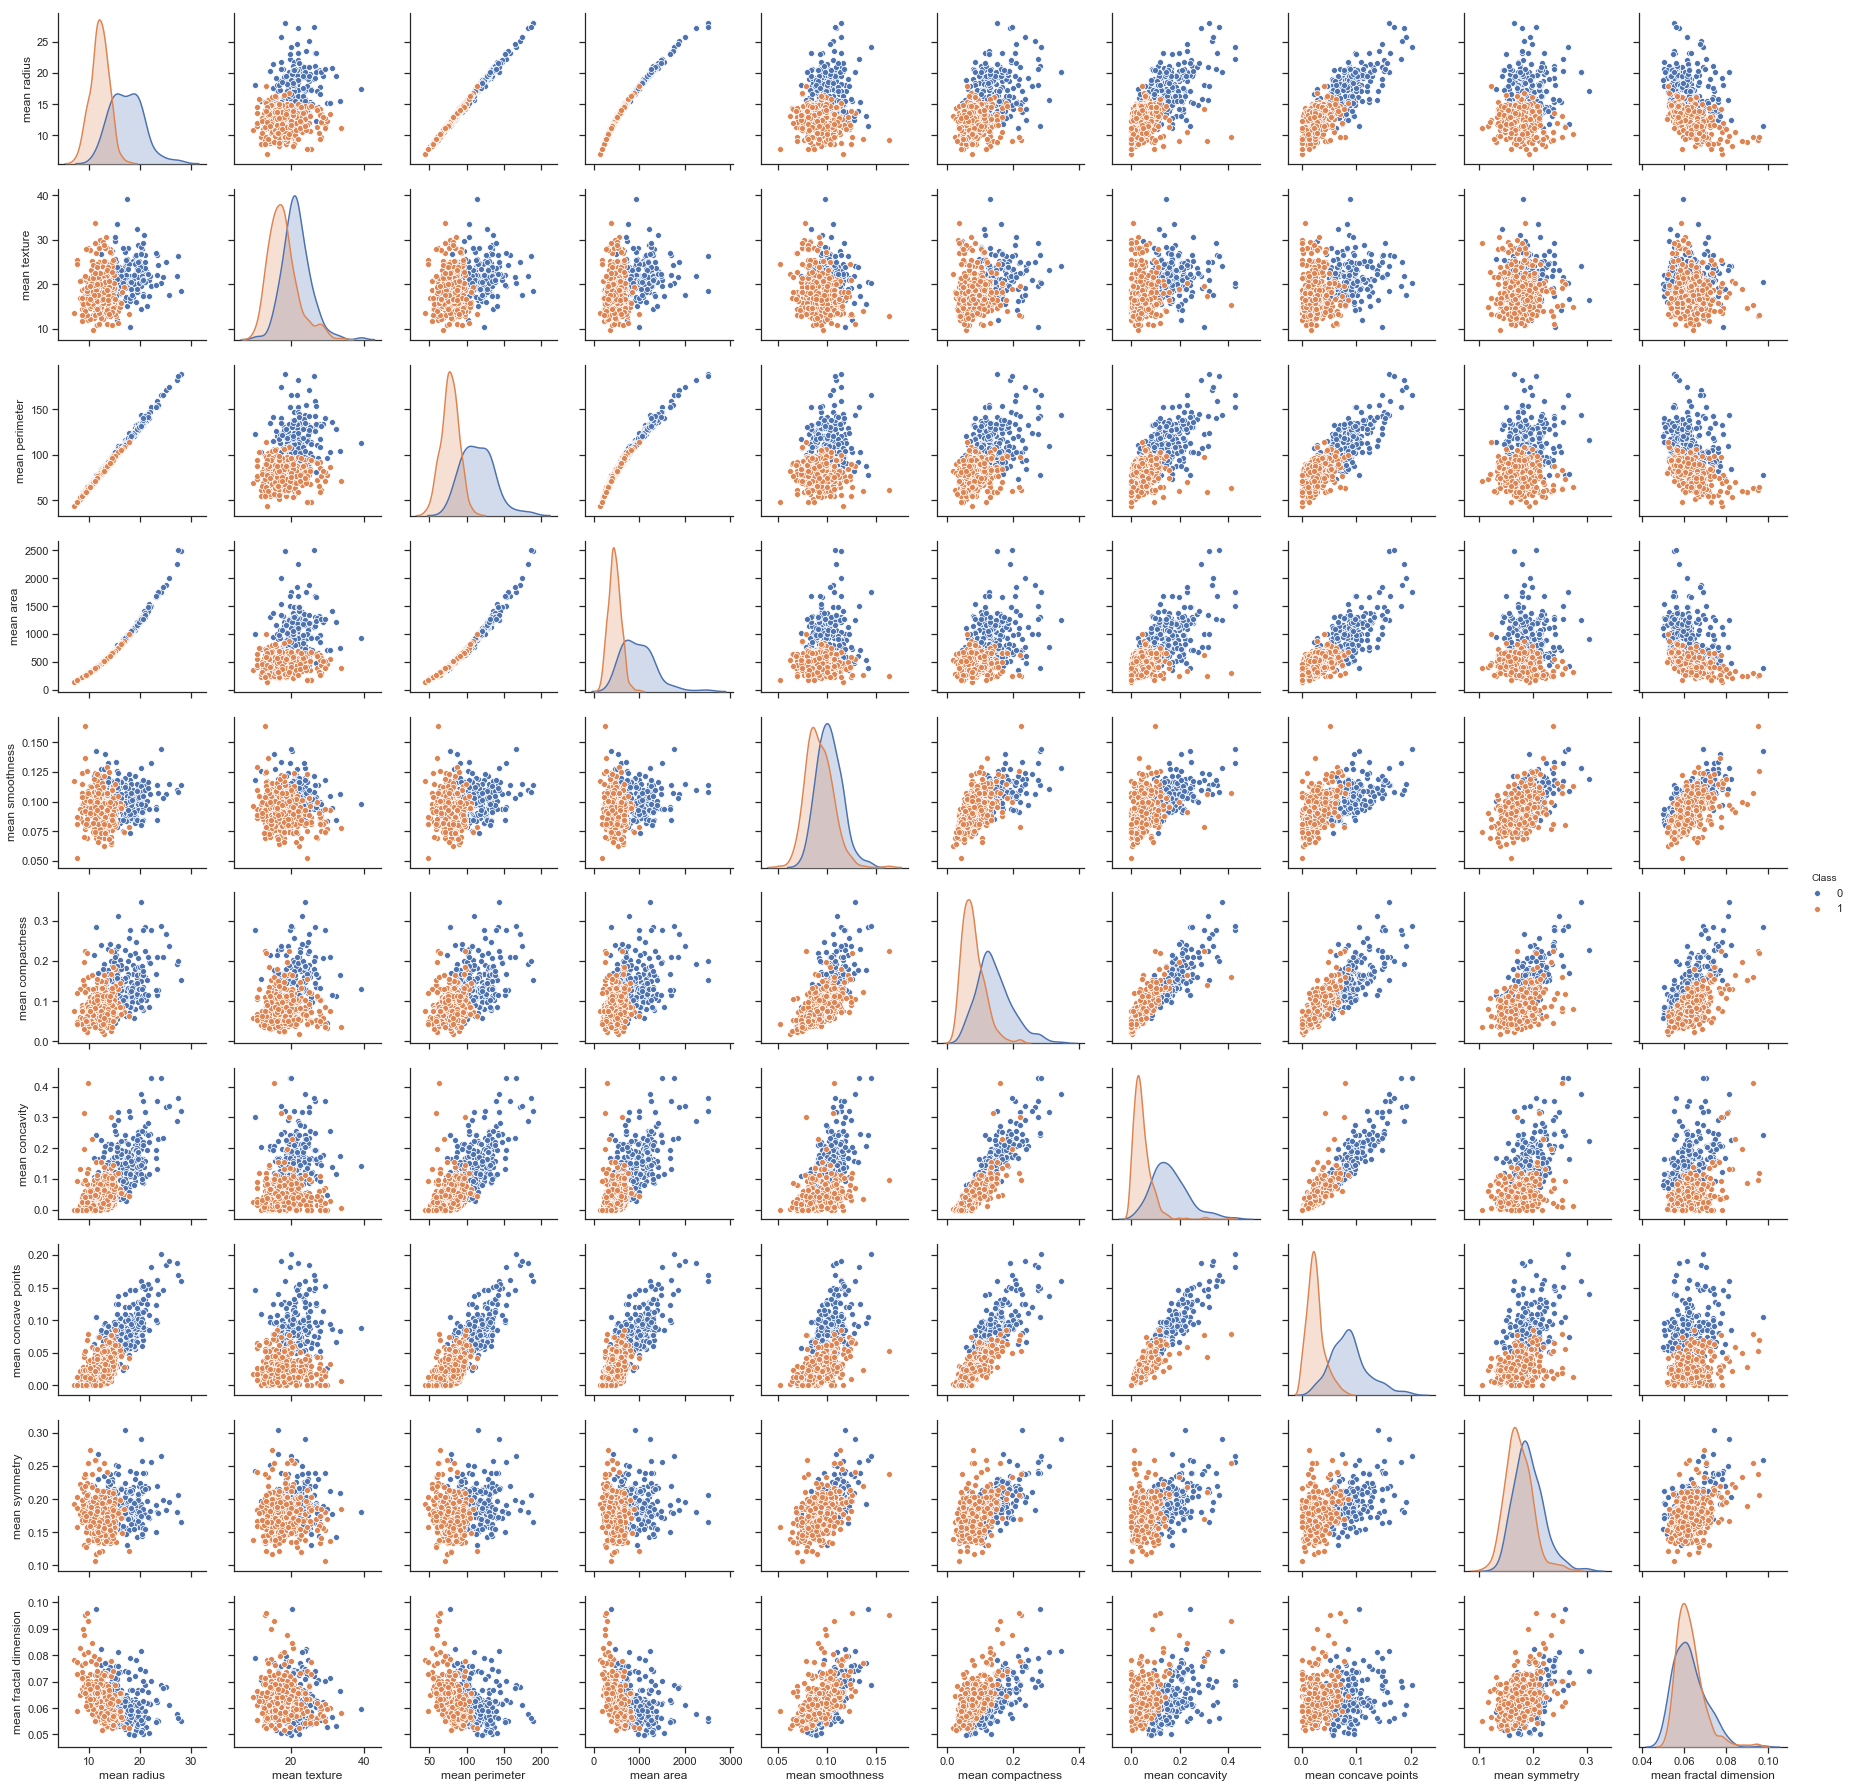

In [40]:
sns.pairplot(pd.concat([bc_targets_df, bc_features_df], axis=1), hue = 'Class', vars = bc_features_df.columns)

    * From the above plots, obviously only one of radius, perimeter and area should be considered as a feature.
    
    * Mean symmetry, smoothness and texture are similar between the two types of the cells. Fractal dimension could probably be used as a feature.
    

In [43]:
# Correlations between different features
bc_features_df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [46]:
feature_corr =  bc_features_df.corr(method='pearson')
mask = np.zeros_like(feature_corr)

In [48]:
mask[np.triu_indices_from(mask)] = True

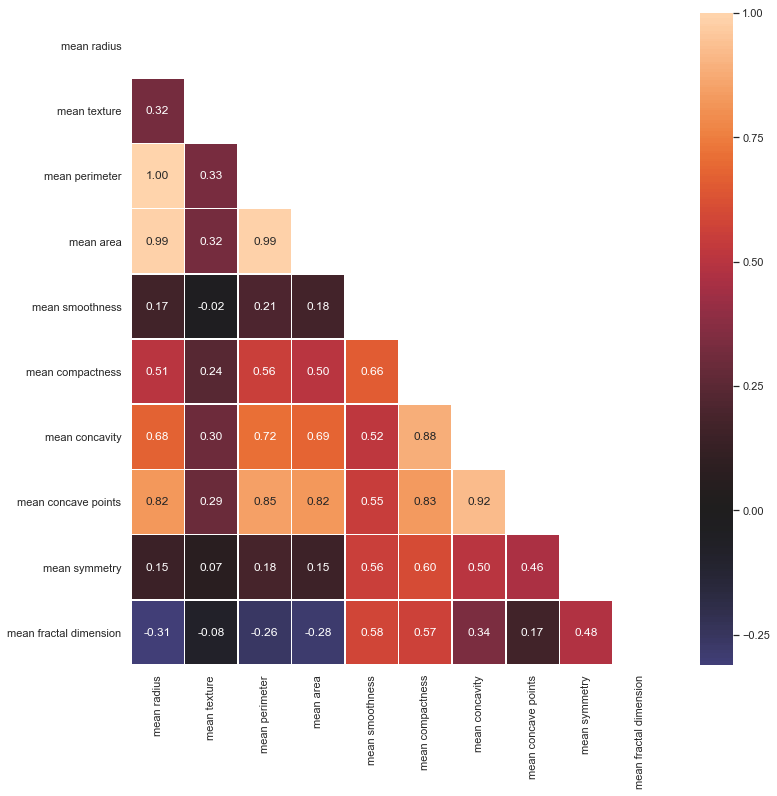

In [63]:
plt.figure(figsize=(12,12))

with sns.axes_style(style='white'):
    sns.heatmap(feature_corr, mask = mask, annot=True, fmt = "0.2f",linewidths=0.5, center=0)

    * High correlation (> 0.9) between concavity and concave points. Hence, only one will be used as a predictor; in this case, concavity.

    * From the pairplots and heatmap, the features that will be chosen as predictors, in the 1st iteration, are radius, compactness, concavity and fractal dimension.

In [56]:
bc_features_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'],
      dtype='object')

In [55]:
chosen_features = bc_features_df.columns[[0,5,6,9]]
chosen_features

Index(['mean radius', 'mean compactness', 'mean concavity',
       'mean fractal dimension'],
      dtype='object')

In [58]:
feature_dataset = bc_features_df[chosen_features]
feature_dataset.head(5)

,mean radius,mean compactness,mean concavity,mean fractal dimension
0,17.99,0.27760,0.3001,0.07871
1,20.57,0.07864,0.0869,0.05667
2,19.69,0.15990,0.1974,0.05999
3,11.42,0.28390,0.2414,0.09744
4,20.29,0.13280,0.1980,0.05883


#### Upsampling strategies

In [20]:
from sklearn.preprocessing import StandardScaler